In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
import numpy as np

arr, reps, bills = np.load("house_votes.npy")
# print(arr.shape)
# print(reps)
# print(len(bills))

In [26]:
distances = np.zeros((arr.shape[1], arr.shape[1]))
for i in range(arr.shape[1]):
    for j in range(arr.shape[1]):
        distances[i][j] = np.sum(np.absolute(arr[:, i] - arr[:, j]))

<IPython.core.display.Javascript object>


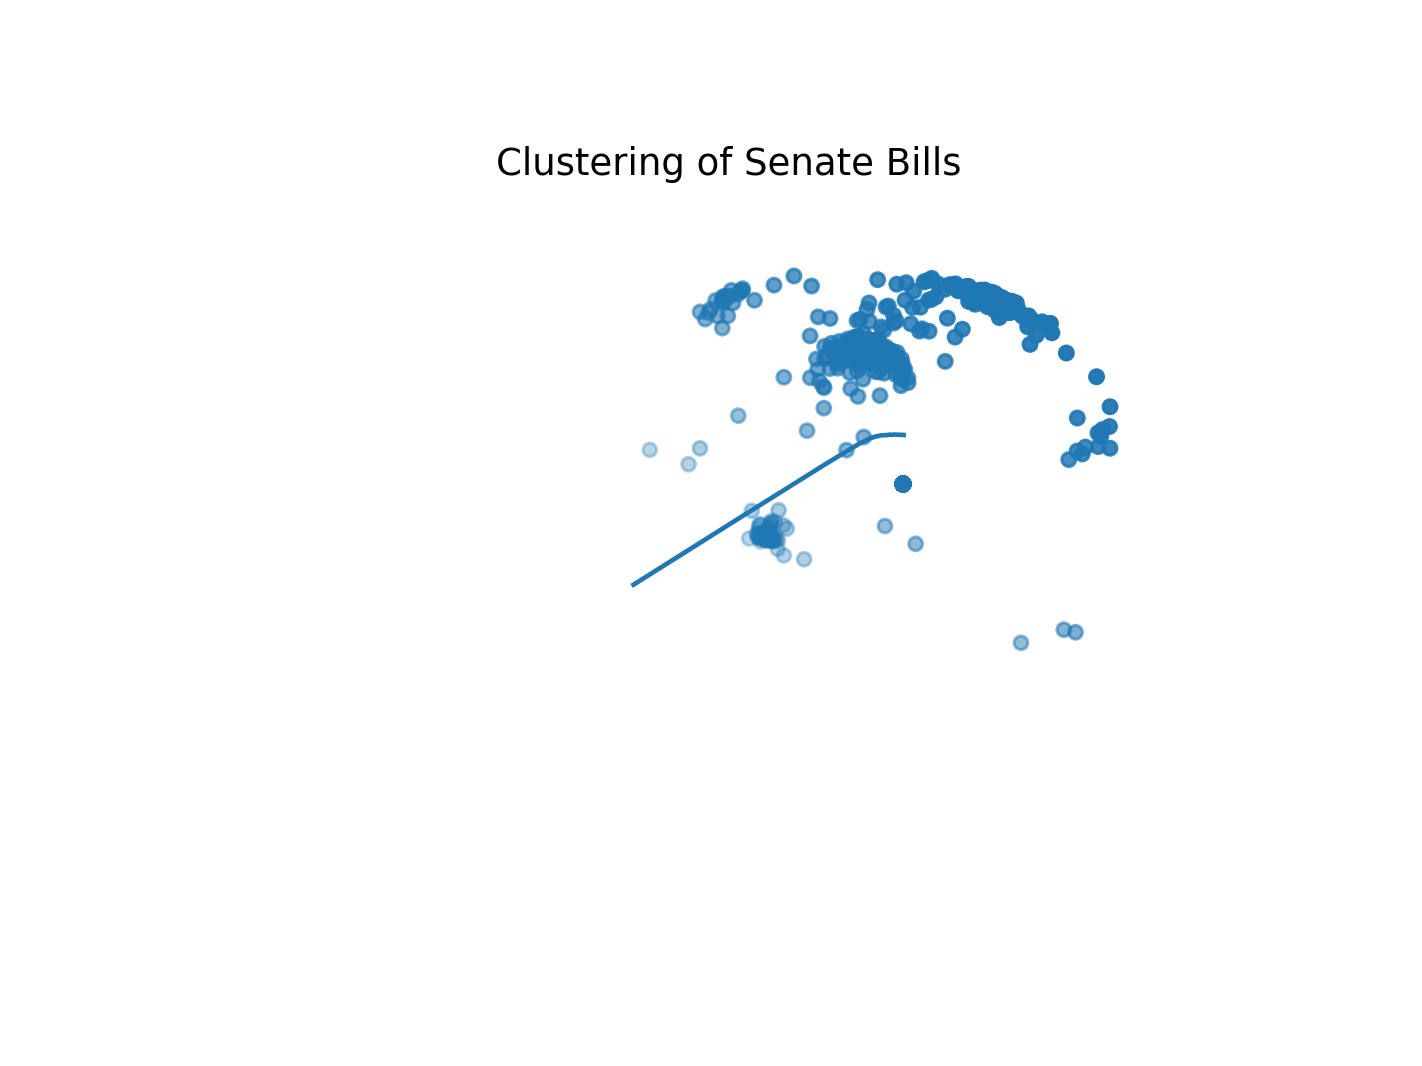

In [27]:
model = MDS(n_components=3, dissimilarity='precomputed', random_state=1, n_jobs=4)
out = model.fit_transform(distances)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Clustering of Senate Bills')
ax.set_axis_off()
ax.scatter(out[:, 0], out[:, 1], out[:, 2])
plt.show()

In [28]:
nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(arr.T).score(arr.T) for i in range(len(kmeans))]
plt.plot(nc, score)
plt.show()

<IPython.core.display.Javascript object>


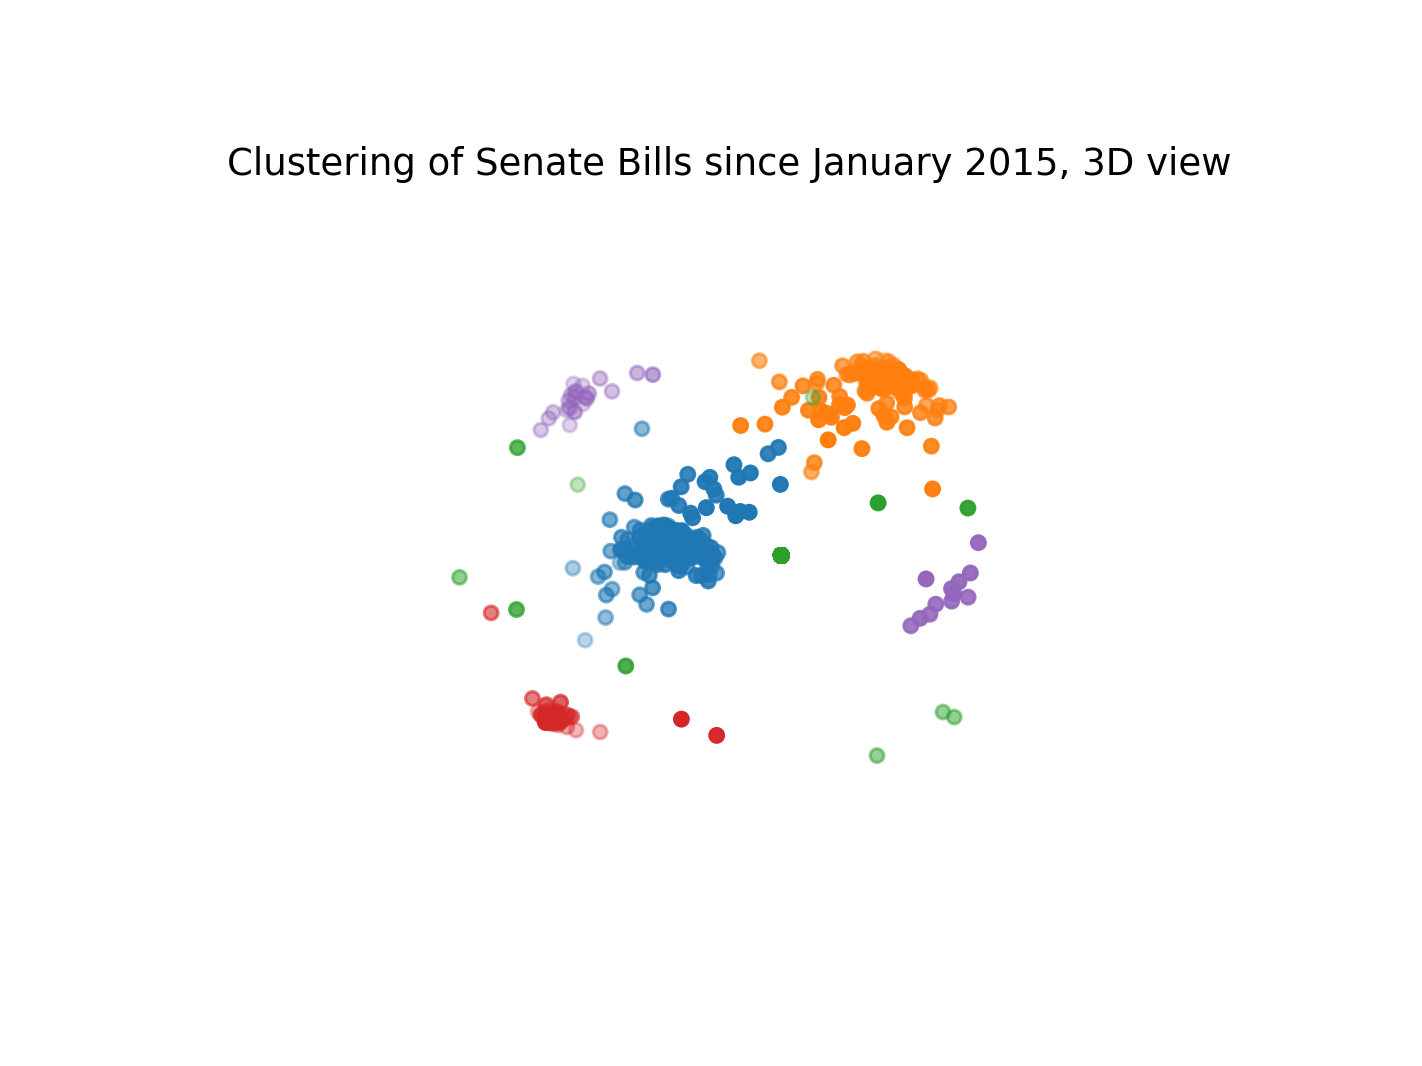

In [29]:
num_clust = 5
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Clustering of Senate Bills since January 2015, 3D view')
ax.set_axis_off()
for i in range(num_clust):
    ax.scatter(out[centers == i, 0], out[centers == i, 1], out[centers == i, 2])
plt.show()

## everything below is old stuff

In [5]:
# pca = PCA(n_components='mle')
# pca.fit(arr.T)
# arr_pca = pca.transform(arr.T)

[[ 1.04722821e+00  4.53238094e+00 -3.93859044e-01 ...  1.16800730e-03
  -5.30414782e-04 -6.18391678e-04]
 [-1.44350521e+01 -5.73411922e-01 -6.80522223e-01 ... -1.16890045e-02
   6.58703375e-02  1.01818174e-02]
 [-1.50262618e+01 -4.48192959e-01 -4.27519636e-01 ...  4.76782131e-03
   4.27613153e-02  1.63427165e-02]
 ...
 [ 1.68214703e+01  9.47033043e+00 -5.90730450e-01 ... -6.50072512e-03
  -8.71131058e-03 -2.95277877e-02]
 [ 1.69323146e+01  9.51070672e+00 -5.74434060e-01 ... -1.50552150e-02
  -4.76879133e-03  5.60969299e-04]
 [ 1.07047572e+01  7.66053937e-01  1.20420832e+00 ...  1.85621559e-02
  -5.27820962e-02  2.59235069e-02]]


In [6]:
# print(arr_pca.shape)

(1295, 285)


<IPython.core.display.Javascript object>


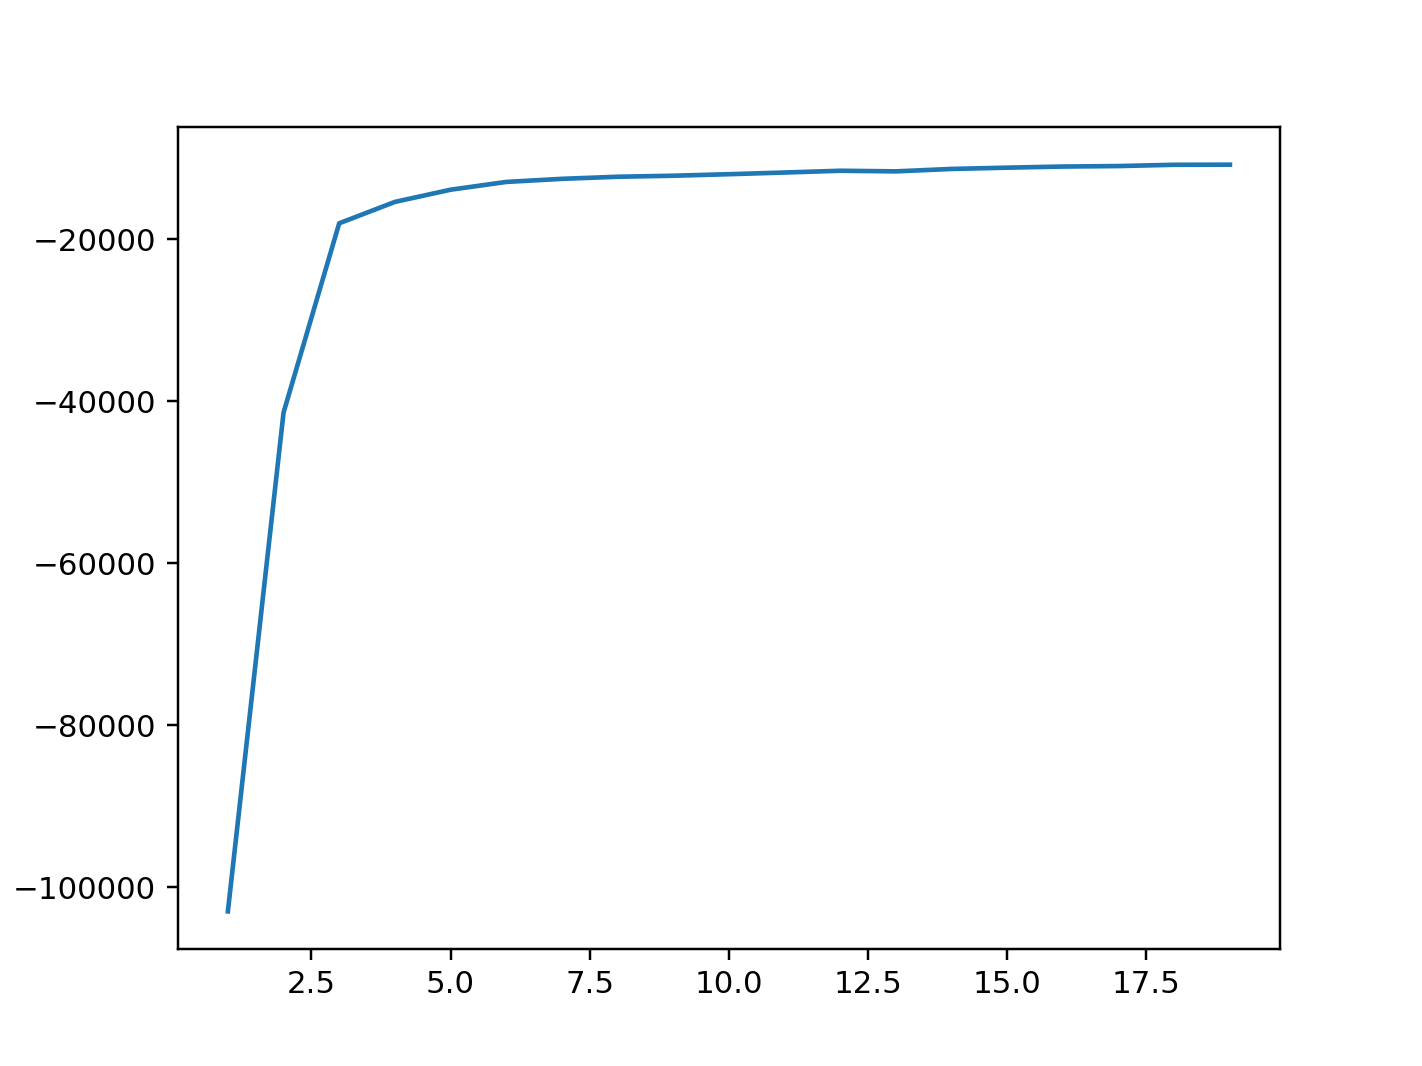

In [3]:
nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(arr.T).score(arr.T) for i in range(len(kmeans))]
plt.plot(nc, score)
plt.show()

In [5]:
em = TSNE(n_components=3).fit_transform(arr.T)

<IPython.core.display.Javascript object>


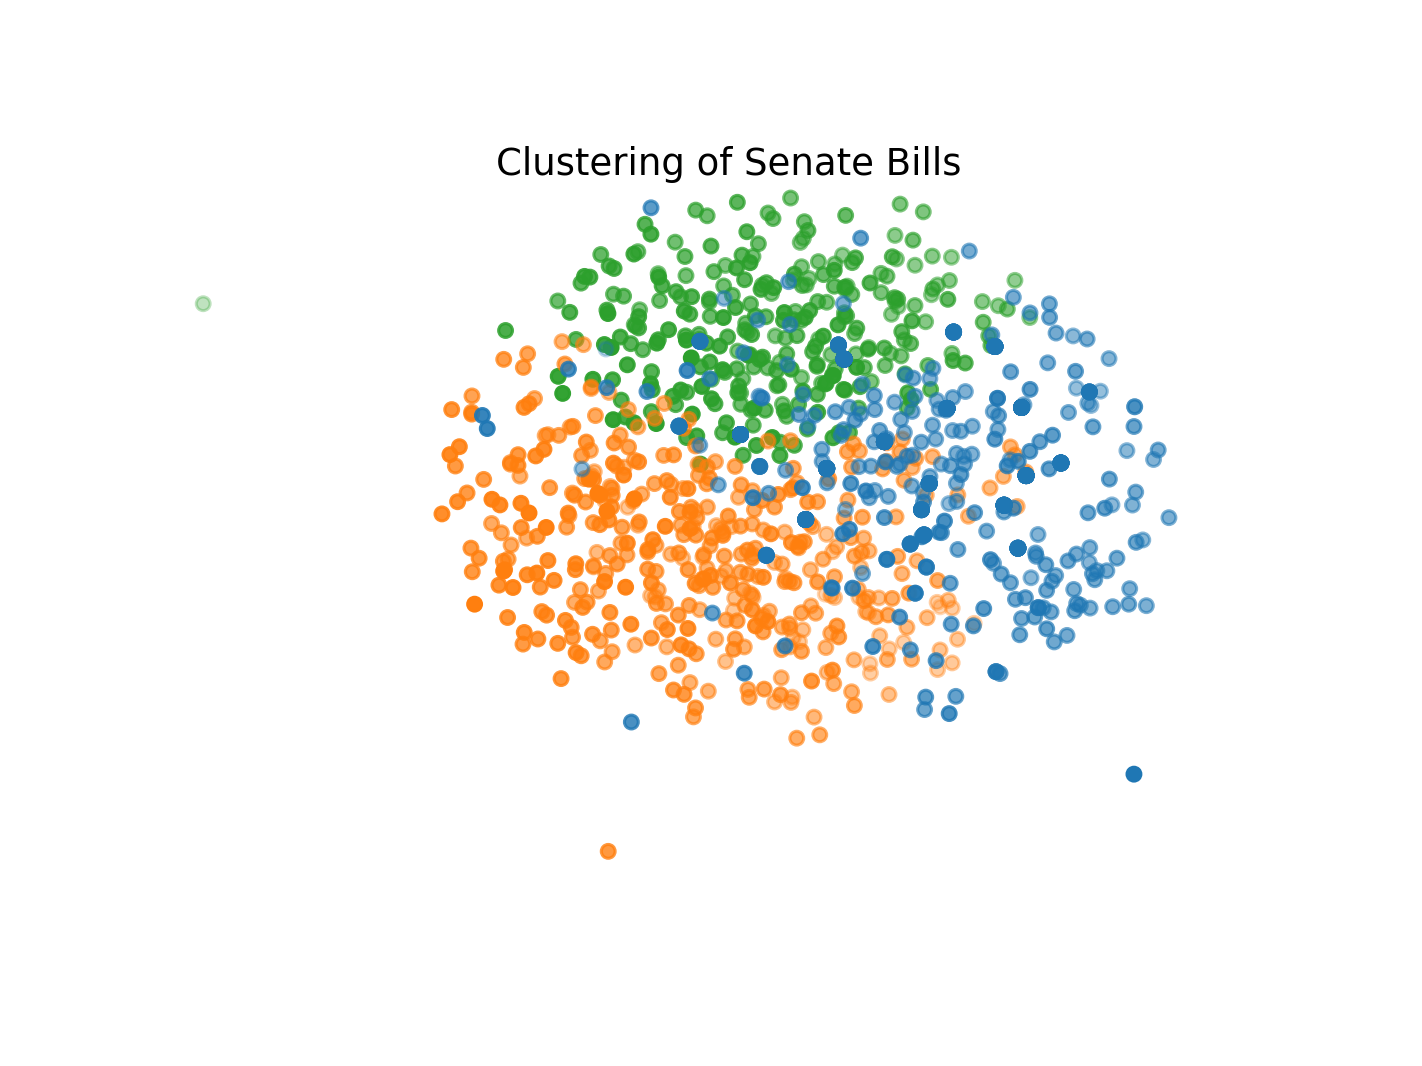

In [6]:
# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 3
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Clustering of Senate Bills')
ax.set_axis_off()
for i in range(num_clust):
    ax.scatter(em[centers == i, 0], em[centers == i, 1], em[centers == i, 2])
plt.show()

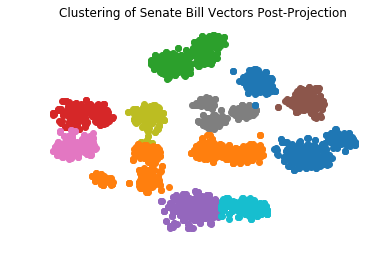

In [3]:
# Do the same after projection (not really that useful)
plt.axis('off')
num_clust = 13
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.title('Clustering of Senate Bill Vectors Post-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

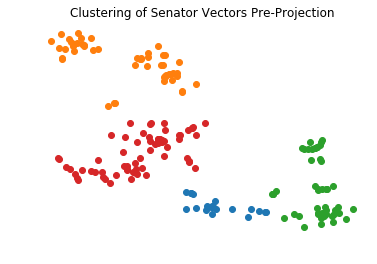

In [4]:
# And for the senators

em = TSNE(n_components=2).fit_transform(arr)
num_clust = 4
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Senator Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

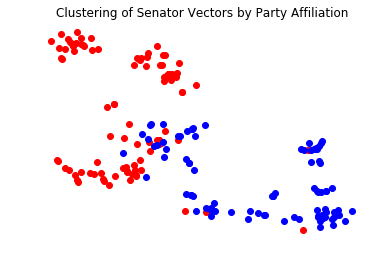

In [ ]:
import numpy as np

# Senators by party with same projection

num_clust = 2
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Clustering of Senator Vectors by Party Affiliation')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1], color='r' if i == 0 else 'b')
plt.show()

In [ ]:
# Now use house data
arr, reps, bills = data_loader.house_records()

print(arr)

Unable to read 2017_711.xml
Unable to read 2013_2.xml
Unable to read 2011_2.xml
Unable to read 2015_2.xml
Unable to read 2017_2.xml
Unable to read 2019_2.xml
Unable to read 2015_581.xml


[[-1.  1.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [-1. -1.  0. ...  0. -1.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0. -1.  0.]
 [-1.  0.  0. ...  0. -1.  0.]]


In [ ]:
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 18
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of House Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show();

In [ ]:
# House representative vector clustering
em = TSNE(n_components=2).fit_transform(arr)
num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Representative Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

In [ ]:
# House representative vectors by party
num_clust = 2
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Representative Vectors by Party')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1], color='r' if i == 0 else 'b')
plt.show()